<div dir='rtl'>
    امین روانبخش ۹۶۱۰۹۷۲۵
</div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from sklearn import svm

In [4]:
train_np = np.load('train.npy')
test_np = np.load('test.npy')

In [5]:
# flatten data
def flatten_matrix(M):
    shape = M.shape
    flat_matrix = []
    for i in range(shape[0]):
        for j in range(shape[1]):
            x = M[i][j].flatten()
            flat_matrix.append(x)

    return np.array(flat_matrix)

# average
def get_ave_matrix(matrix):
    n = len(matrix)
    s = np.sum(matrix, axis = 0)
    return s/matrix.shape[0]
    
# variance
def get_var_matrix(matrix):
    m = get_ave_matrix(matrix)
    shape = matrix.shape
    diff = matrix - m
    var = np.matmul(diff.T, diff)
    var /= shape[1]
    return var

# variance 2
def get_var_matrix_transpos(matrix):
    m = get_ave_matrix(matrix)
    diff = matrix - m
    var = np.matmul(diff, diff.T)
    var /= matrix.shape[0]
    return var

# الف

<div dir='rtl'>
    در این بخش به تشکیل ماتریس کواریانس می‌پردازیم و ۵ مقدار ویژه بزرگ‌تر آن را جدا می‌کنیم.
</div>

In [19]:
train = flatten_matrix(train_np)
test = flatten_matrix(test_np)
# print(train)
# print(test)

In [20]:
var_train = get_var_matrix_transpos(train)
eig_vals, eig_vecs = np.linalg.eig(var_train)
print("best eigen values:")
for i in range(5):
    print(eig_vals[i])

best eigen values:
34360313.18602986
11986016.93174558
4582631.011756648
2243734.6189662004
1989056.0253967158


# ب

<div dir='rtl'>
    با توجه به این که محاسبه ویژه بردار در روش قبلی بسیار زمان بر و بزرگ خواهد بود به جای آن از روش svd استفاده می‌کنیم.
    <br>
     در این روش کافی است بردار تفاضل هر عکس از میانگین آنها را به تابع linalg.svd می‌دهیم و نتایج بدست آمده توسط آن به صورتی است که ویژه مقدار‌ها توان دوی مقدار ویژه‌ها در روش قبلی می‌باشند ولی ویژه بردار‌ها برابر با ویژه‌بردار روش قبلی می‌باشد.
    <br>
    برای انتخاب ویژه بردار‌ها نیز هر کدام که دارای ویژه مقدار بزرگتری است را انتخاب می‌کنیم زیر اطلاعات بیشتری در آن است.
    
</div>

In [21]:
z = train - get_ave_matrix(train)

U, S, V = np.linalg.svd(z, full_matrices=False, 
    compute_uv=True)

landa = np.square(S) / z.shape[0]
# print(V.shape)
# print(landa)
# print(S)
# print(S)
# for i in range(5):
#     print(V[:,i])

In [22]:
V_select = V[:5]
ef_space = np.matmul(train, V_select.T)
# print(ef_space.shape)

In [23]:
# print pictures from data
def showPic(data):
    plt.imshow(np.reshape(data, (192, 168)), interpolation='nearest')
    plt.show()

# reconstruct_data
def reconstruct_data(data, ave_matrix, eigen_vectors):
    return ave_matrix + np.matmul(data, eigen_vectors)
    

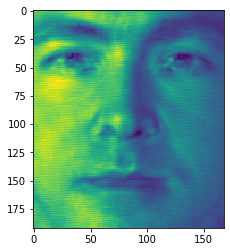

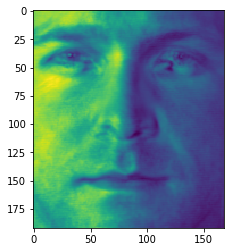

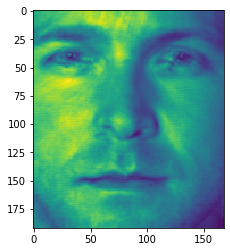

In [24]:
selection_train = np.random.choice(range(train.shape[0]), 3)
data_selection = ef_space[selection_train]

ave_matrix = get_ave_matrix(train)
for data in data_selection:
    recponstructed_data = reconstruct_data(data, ave_matrix, V_select)
    showPic(recponstructed_data)

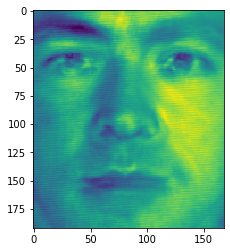

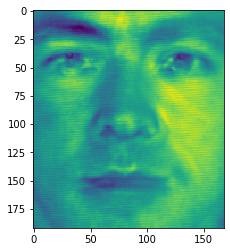

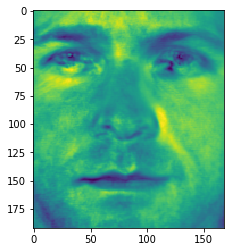

In [25]:
ef_space_test = np.matmul(test, V_select.T)
selection_test = np.random.choice(range(test.shape[0]), 3)
data_selection = ef_space[selection_test]

ave_matrix = get_ave_matrix(test)
for data in data_selection:
    recponstructed_data = reconstruct_data(data, ave_matrix, V_select)
    showPic(recponstructed_data)

<div dir='rtl'>
    همان طور که قابل مشاهده است تصاویر به خوبی بازسازی شده‌اند. دلیل آن این است که در ۵ بردار اول حجم زیادی از اطلاعات وجود دارد. دلیل بازسازی خوب داده‌های آزمایش‌هم به دلیل اشتراک عکس‌های افراد یکسان درون data set هاست. به همین دلیل میانگین عکس در هر دو data set به یک صورت است و نتایج در هر دو data set مطلوب است.
</div>

# پ

9


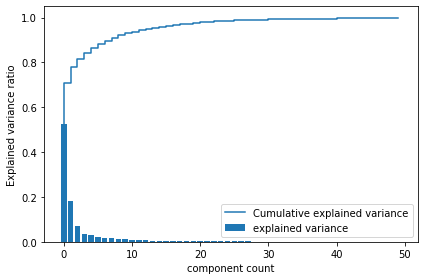

In [30]:
# cdf of information
sum_eig_vals = sum(eig_vals)
var_exp = [(i/sum_eig_vals) for i in eig_vals]
cdf_var_exp = np.cumsum(var_exp)

# find count of eigen vectors and eigen values
threshold_percent = 0.9
threshold_count = 0
for i in range(len(cdf_var_exp)):
    if cdf_var_exp[i] > threshold_percent:
        threshold_count = i + 1
        break
        
print(threshold_count)

# figure cdf
plt.step(range(0,len(cdf_var_exp)), cdf_var_exp, label='Cumulative explained variance')
plt.bar(range(0,len(var_exp)), var_exp, label='explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('component count')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [31]:
Y_train = np.array([i//5 for i in range(len(train))])
Y_test = np.array([i//4 for i in range(len(test))])
X_test = test
X_train = train

complete_SVM = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr').fit(X_train, Y_train)
complete_accuracy = complete_SVM.score(X_test, Y_test)
complete_predition = complete_SVM.predict(X_test)
print('complete data prediction accuracy:',complete_accuracy)

complete data prediction accuracy: 0.525


In [32]:
V_select = V[:threshold_count]
X_train_ef = np.matmul(train, V_select.T)
X_test_ef = np.matmul(test, V_select.T)

ef_SVM = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr').fit(X_train_ef, Y_train)
ef_accuracy = ef_SVM.score(X_test_ef, Y_test)
ef_predition = ef_SVM.predict(X_test_ef)
print('eigen face data prediction accuracy:',ef_accuracy)

eigen face data prediction accuracy: 0.5


<div dir='rtl'>
    همان طور که مشاهده می‌شود تفاوت خاصی در نتایج داده‌های اصلی و فضای کاهش یافته نیست. دلیل این موضوع این که است که در هر دو حالت حجم خوبی از اطلاعات داده‌اصلی برای دسته‌بندی به توابع داده‌ شده‌ است. در واقع این نتیجه مزیت خوب PCA در بازیابی اطلاعات را به ما نشان می‌دهد که حجم خوبی از اطلاعات را حفظ می‌کند.
<div>